<ipython-input-9-995277620b69>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


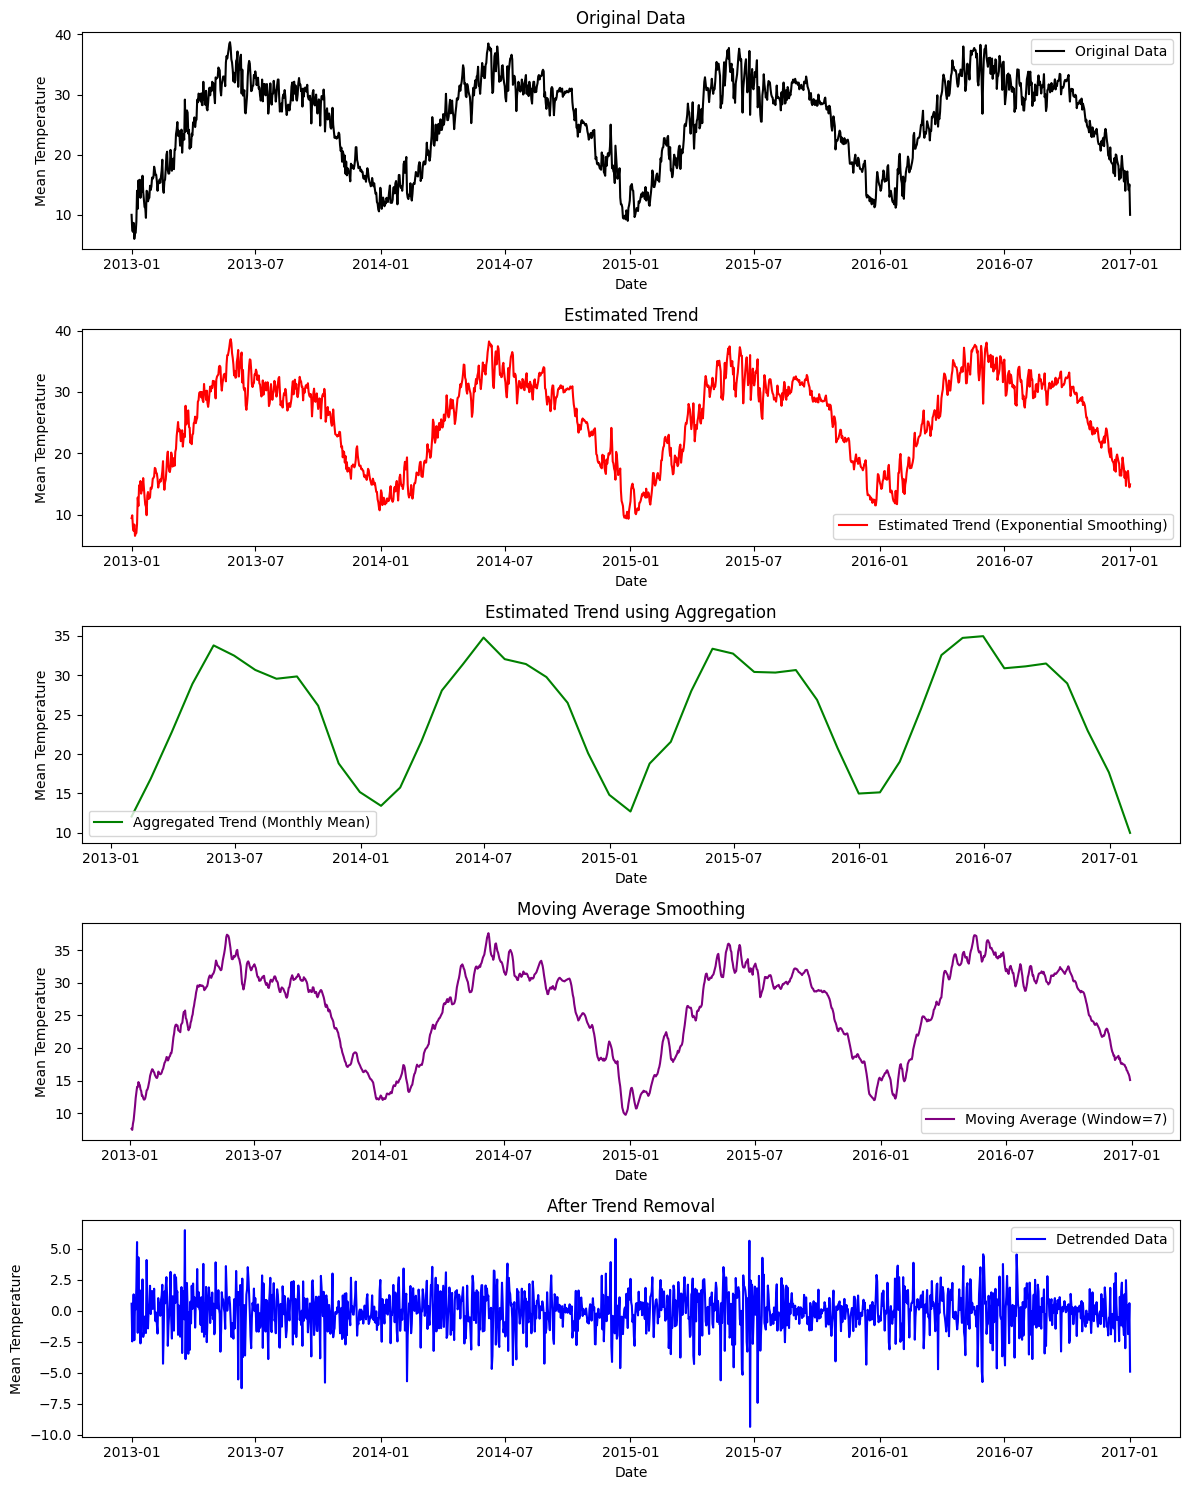

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/TS/Exp4/DailyDelhiClimateTrain.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Extract meantemp for trend analysis
data = df['meantemp']

# Aggregation (Monthly Mean)
data_monthly = data.resample('M').mean()

# Moving Average Smoothing
window_size = 7
data_moving_avg = data.rolling(window=window_size, center=True).mean()

# Exponential Smoothing
model = ExponentialSmoothing(data, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()
data_trend = fit.fittedvalues

data_detrended = data - data_trend

# Plot Original Data, Estimated Trend, Aggregation, Moving Average, and Detrended Data
plt.figure(figsize=(12, 15))

plt.subplot(5, 1, 1)
plt.plot(data.index, data, label='Original Data', color='black')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Original Data')

plt.subplot(5, 1, 2)
plt.plot(data.index, data_trend, label='Estimated Trend (Exponential Smoothing)', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Estimated Trend')

plt.subplot(5, 1, 3)
plt.plot(data_monthly.index, data_monthly, label='Aggregated Trend (Monthly Mean)', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Estimated Trend using Aggregation')

plt.subplot(5, 1, 4)
plt.plot(data.index, data_moving_avg, label='Moving Average (Window=7)', color='purple')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Moving Average Smoothing')

plt.subplot(5, 1, 5)
plt.plot(data.index, data_detrended, label='Detrended Data', color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('After Trend Removal')

plt.tight_layout()
plt.show()
